# **Exploratory data analysis of Shrinkme** 
### _Customer behaviour data of a multi-category e-commerce store_




![](https://images.unsplash.com/photo-1592503254549-d83d24a4dfab?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZWNvbW1lcmNlfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1789&q=80)

### **Introduction**

_" The Matrix is everywhere. It is all around us. Even now in this very room. You can see it when you look out of your window, or when you turn on your television. You can feel it when you go to work...."_                     _- Morpheus, The Matrix 1999_

Fast forward to 2021, we are deeply enmeshed in the virtual world for social lives, shopping online, working or learning remotely.   
- It is critical for businesses of any type and size to have an online presence. Retail e-commerce sales which refers to sales from B2C worldwide was 4.28 trillion US dollars in 2020. Over 2 billion people purchased goods or services online during the same year.[ref](https://www.statista.com/topics/871/online-shopping/)    
- Analysing customer behaviour helps businesses to increase customer value and therefore spend by content personalisation and optimisation.  
- Based on this analysis, a profile of the customer is created, they are grouped into segments by their digital footprint , interests and behaviour.   

Exploratory analysis and predictive analysis techniques help businesses to structure and recalibrate their pricing, marketing, inventory stragies and more in real-time.

B2C e-commerce businesses generate voluminous amounts of data. In this notebook we will perform the exploratory data analysis for a multicategory store using Python, Pandas, Matplotlib and Seaborn.

 - Identify a dataset for analysis
 - Explore techniques to work with large data sets
 - Pre-process or prepare the data for analysis
 - Transform the data into various summary views
 
Let us call this anonymised datset **Shrinkme**. We will use our framework to ask and answer interesting questions, create visualisations for the following areas of interest:

- Pattern of visits by  day , day of week or hour of day
- View and purchase patterns for products  and categories
- Popular brands and their contribution to monthly sales
- Segment customers using RFM


**CAUTION:** I recommed opening and running this notebook on Google Colab for two reasons
1. Large dataset: 5GB, binder runs into issues
2. Ease of navigation with Colab table of contents: This is a long notebook. I tried to pack in a lot of information as I faced several challenges as a newbie to e-commerce datasets and python EDA on large datasets. 


### **About the data**

In this analysis we will use the "eCommerce behavior data from multi category store" data by Michael Kechinov on [Kaggle](https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store) from the [REES46 Marketing Platform](https://rees46.com/).

The Kaggle dataset has two `.csv` files
- 2019-Nov.csv 8.4 GB and 67.5 million records
- 2019-Oct.csv 5.3GB and 42.4 million records

**We will build the framework with and perform the analysis on the `2019-Oct.csv` file.** 

Each `.csv` file has the following structure of 9 columns
1. `event_time`: Time when the event occured (in UTC) in the format "2019-10-01 00:00:04+00:00"
2. `event_type`: A single event either "view", "cart" or "purchase"
3. `product_id`: A unique code for each product
4. `category_id`: A unique code for each product category
5. `category_code`: A '.' separated text  with names of categories and subcategories "electronics.smartphone"	
6. `brand`:  Brand name of the product "apple" 
7. `price`: Price of the product in decimals "1081.98"  
8. `user_id`: A permanent unique ID per shopper "554748717"
9. `user_session`: A temporary ID per session "9333dfbd-b87a-4708-9857-6336556b0fcc"



![](https://i.imgur.com/ZXrYJp8.png)

**How to read the data**

At time `event_time` and during session `user_session`, user `user_id` `purchased` (event_type is "purchase") a product `product_id` of brand `brand` in category `category_code` of price `price`.

Assumptions and notes for this analysis :
- Each unique session is a visit
- There are no `remove_from_cart` events in this dataset
- A session may have just one `purchase` event and no related `view` or `cart` events.
- A session can have multiple purchase events
- `category_code` is usually present for meaningful categories and skipped for the rest.
- Price is assumed to be in US Dollars


## **Happy Coding!!**
Use the "Run" button to execute the code.

### **Install packages and import libraries**

In [ ]:
!pip install numpy pandas==1.1.5 plotly==4.7.1 opendatasets pyarrow squarify pygal --upgrade --quiet

In [ ]:
# Import python data analysis libraries
import pandas as pd
import numpy as np

# Import library to download data from Kaggle
import opendatasets as od

# Import visualisation libraries
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from wordcloud import WordCloud
import pygal
from pygal.style import Style
import squarify


Let us set a base style for all our visualisations in this notebook. These customisations from [Mounir](https://jovian.ai/kara-mounir) create excellent clarity images to use in presentations. You can override them and customise individual plots as  required.

In [ ]:
# Set plot parameters for the notebook
%matplotlib inline
sns.set_style('white')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['xtick.major.pad']='10'
matplotlib.rcParams['ytick.major.pad']='10'
# 
import warnings
warnings.filterwarnings("ignore")

Setup your google drive to save intermediate results.

In [ ]:
# Import Drive API and authenticate.
from google.colab import drive

# Mount my Google Drive to the Colab VM.
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Execute this to save new versions of the notebook
#jovian.commit(project="zerotoanalyst-ecomm-eda")

### **Working with large datasets**

#### **Data download**

Let us download the data from Kaggle using the `opendatasets` library. You will need your Kaggle access token handy.

In [ ]:
#Kaggle url for the dataset
data_url = 'https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store'
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sillyfalcon
Your Kaggle Key: ··········


  0%|          | 5.00M/4.29G [00:00<02:05, 36.6MB/s]

100%|██████████| 4.29G/4.29G [00:58<00:00, 79.4MB/s]


Let us check if the data has been downloaded.

In [ ]:
!ls -lh ecommerce-behavior-data-from-multi-category-store

total 14G
-rw-r--r-- 1 root root 8.4G Jun 12 04:17 2019-Nov.csv
-rw-r--r-- 1 root root 5.3G Jun 12 04:19 2019-Oct.csv


The data has been downloaded and unzipped to the folder ``./ecommerce-behavior-data-from-multi-category-store` Let us now check the size of the folder. There are two files in this folder. 
1. 2019-Nov.csv 8.4 GB
2. 2019-Oct.csv 5.3GB

We will select  `2019-Oct.csv` for our analysis

In [ ]:
!wc -l ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv

42448765 ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv


There are 42.44 million records in 2019-Oct csv

In [ ]:
%%time
oct_2019_csv = './ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv'
#load the file using Pandas. 
#oct_2019_df = pd.read_csv(oct_2019_csv)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10 µs


Phenomenal!! That's 5.3 GB data with 42 million records loaded into a Pandas dataframe in under 2 mins!! With `parse_dates` the time taken to read the csv into the datafram is 10min 43s.

In [ ]:
#oct_2019_df.info()

There are 42.4 million rows and 9 columns in the dataset. Using Pandas this dataset is now 2.8 GB  from 5.3GB as a `.csv` 

#### **Work with a sample - a fraction of the dataset**

As this massive dataset let's use 1% of the data to build our EDA framework. This is very important and often overlooked. Working on a smaller sample saves significant time while experimenting with code.

Once we have the full framework ready, we can run the analysis on the complete dataset.

In [ ]:
#create a sample of 1% from the dataset
%%time
#oct_2019_sample_df = oct_2019_df.sample(frac=0.01)
#oct_2019_sample_df.info()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


Our sample dataset now contains 424k rows and the same 9 columns. It is 32.4 MB in size.

#### **Save intermediate results**

While working with large datasets, you may runtinto runtime issues. Therefore it will be helpful to save the intermediate results to your google drive or a local folder to pick up and continue from the point.  

Let us save this sample dataset into my google drive. We will use the data in this file to build our framework.

We will continue to save short snapshots of data offline as we move along the notebook. You can save the data in various formats including binary formats such as `.feather`

In [ ]:
# Write the DataFrame to CSV file.
#with open('/gdrive/My Drive/eda-ecomm-project/sample-oct-2019.csv', 'w') as f:
#    oct_2019_df_sample.to_csv(f)

#### **Explore faster loading and lesser memory**

We will use some techniques to load data to Pandas faster and use less memory.

- **drop columns:** select a subset of columns relevant for analysis
- **identify categorical columns:** change the dtype tp `category`
- **parse_dates:** change columns with date\time to type `DateTime`
- set **DateTime** column as the **index**
- **use smaller dtypes**: we don't see any need as of now

In [ ]:
#use only a subset of the columns
selected_columns = ['event_time', 'event_type', 'category_code', 'brand', 'price', 'user_id', 'user_session']
change_dtype = {'event_type':'category'} 

**Note:** Remove comment in the cell below to run the analysis on the appropriate dataset.

In [ ]:
#Sample data
#sample_csv_url = '/gdrive/My Drive/eda-ecomm-project/sample-oct-2019.csv'

#Full data
sample_csv_url = oct_2019_csv

Load the data to a Pandas dataframe.

In [ ]:
# load data with read_csv() choosing selected columns, dtypes and parse_dates
%%time

ecomm_df = (pd.read_csv(sample_csv_url, 
                       index_col= 'event_time',      #set index
                       usecols= selected_columns,    #use a subset of columns
                       dtype= change_dtype,          #change dtype of selected columns
                       parse_dates= ['event_time'])
                       ) #change dtype tp DateTime

CPU times: user 10min 37s, sys: 18.8 s, total: 10min 56s
Wall time: 11min 35s


In [ ]:
ecomm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42448764 entries, 2019-10-01 00:00:00+00:00 to 2019-10-31 23:59:59+00:00
Data columns (total 6 columns):
 #   Column         Dtype   
---  ------         -----   
 0   event_type     category
 1   category_code  object  
 2   brand          object  
 3   price          float64 
 4   user_id        int64   
 5   user_session   object  
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 1.9+ GB


Our dataframe is now close to 40% smaller from 32.4MB earlier with the transformations. 

In [ ]:
#Save work
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda


'https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda'

### **Data pre-processing**

Now that we have loaded the data into a Pandas dataframe, let us process the data for the following

- drop duplicates
- replace missing values
- check for outliers

You could analyse the data more to further clean up the data.

#### **Drop duplicates**

Print number of unique values for each columns before checking for duplicates. These are fairly time consuming when we run them on the complete data. They are commented out unless required.

In [ ]:
#ecomm_df.nunique()

In [ ]:
#save duplicates for analysis
duplicates_df = ecomm_df[ecomm_df.duplicated()]
len(duplicates_df)

14008702

In [ ]:
#group duplicates by user_id and user_session for further analysis
grp_df = (duplicates_df.groupby( [ "user_id"])[[ "user_id", "user_session"]].size()
                      .reset_index(name='group_count')
                      .sort_values(by= 'group_count',ascending= False))
#Look at the highest number of duplicates.
grp_df.head(5)

,user_id,group_count
84746,513021392,1560
997230,546270188,1546
741922,532769022,1396
156456,513828022,1257
324905,516308435,1172


Sometimes depending on your data  and index, `pd.duplicated()` may recognise unique values as duplicates. It helps to check whether this is happening here.  Filtering for duplicates when the dataframe had **`event_time` as a 'DateTime` and set as the index** returned 14,008,702 rows as duplicates. Without `event_time` as index, 30,314 rows were duplicates.

In [ ]:
#Check if the data is really duplicated
duplicates_df[duplicates_df['user_id'].isin(['513021392'])].head(5)

,event_type,category_code,brand,price,user_id,user_session
event_time,,,,,,
2019-10-01 11:13:08+00:00,view,electronics.smartphone,meizu,126.13,513021392,a892be15-c5f6-4b9d-b9c5-20a2ac3ccd0e
2019-10-04 09:03:15+00:00,view,electronics.smartphone,vivo,205.90,513021392,4d21a681-611b-4fea-8384-e9b4899aab2c
2019-10-04 09:04:59+00:00,view,electronics.smartphone,vivo,205.90,513021392,4d21a681-611b-4fea-8384-e9b4899aab2c
2019-10-04 09:10:47+00:00,cart,electronics.smartphone,vivo,205.90,513021392,4d21a681-611b-4fea-8384-e9b4899aab2c
2019-10-04 09:10:48+00:00,cart,electronics.smartphone,vivo,205.90,513021392,4d21a681-611b-4fea-8384-e9b4899aab2c


The timestamp is unique if we consider seconds, but these duplicates need to be dropped to avoid overcounting for number of purchases, price etc. So let us go ahead and drop them.

In [ ]:
#drop duplicate rows
ecomm_df.drop_duplicates(keep=False, inplace= True)
#check for missing data
missing_data_pct = ecomm_df.isna().sum().sort_values(ascending=False)/ecomm_df.shape[0]
missing_data_pct*100

category_code    34.897250
brand            16.037858
user_session      0.000010
user_id           0.000000
price             0.000000
event_type        0.000000
dtype: float64

In [ ]:
#check if we still have any duplicates
ecomm_df.drop_duplicates().duplicated().any()

False

#### **Check for outliers**

In [ ]:
pd.options.display.float_format = "{:.2f}".format
ecomm_df.describe()

,price,user_id
count,19820490.00,19820490.00
mean,305.61,533974184.73
std,382.90,18575358.75
min,0.00,33869381.00
25%,64.35,516054427.00
50%,161.84,530812342.00
75%,372.92,552077792.00
max,2574.07,566280860.00


Price is the only column with possible outliers. The max, min and std are seem reasonable. 

#### **Find and replace missing values**

For category code and brand we take our cue from the data description on kaggle that categories are present for meaningful categories. Replace the missing categories and brans with `nocategory` and `nobrand`.

In [ ]:
#replace missing data with nocategory
ecomm_df['category_code'].fillna('nocategory', inplace=True)
ecomm_df['brand'].fillna('nobrand', inplace=True)

In [ ]:
ecomm_df.head(3)

,event_type,category_code,brand,price,user_id,user_session
event_time,,,,,,
2019-10-01 00:00:00+00:00,view,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2019-10-01 00:00:01+00:00,view,furniture.living_room.sofa,nobrand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
2019-10-01 00:00:04+00:00,view,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [ ]:
ecomm_df.nunique()

event_type             3
category_code        127
brand               3415
price              62830
user_id          2798172
user_session     7963579
dtype: int64

We have a surprisingly clean dataset except for the huge number of duplicate rows that we had to drop.

In [ ]:
#Save work
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda


'https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda'

### **Exploratory data analysis**

We are now ready to dive into exploratory data analysis.

#### **Framework design**

In our introduction, we identified some key questions around which we will frame our analysis. 

Before we begin to dive deep into programming with Pandas, I highly recommend creating a draft framework.  A key lesson learnt and reinforced at [Jovian](https://jovian.ai) is to begin with the end goal in mind. When you transform data using Pandas with groupby, merge etc if you are you are not very proficient with Pandas, things can get quickly hairy. Early identification of stages of data flow, high level data summaries and columns  greatly speeds up the programming to handle large datasets.

- Raw Data

- Transformed Data

- Insights

Here is an illustration:

![](https://i.imgur.com/k4xSIYL.png)



Pro tip from [Aakash N S](https://in.linkedin.com/in/aakashns): Use googlesheets to visualise the intermediate and end results. Here is a sample for the `daily_summary_table`

![](https://i.imgur.com/DND3no1.png)

This section for summary views is adapted from EDA - [Kaggle code](https://www.kaggle.com/adilemrebilgic/e-commerce-analytics) by Adil Emre Bilgic

#### **Daily summary tables**

Summarise data by day of the month with number of shoppers and number of visits

In [ ]:
#Create visits_df for visits with user_id and user_session columns
visits_df = ecomm_df[['user_id','user_session']]
#%%time
#Create daily_visits_df with number of unique user_ids and user_session values for each day
daily_visits_df = (visits_df.groupby(by= visits_df.index.floor('D')) # Retain date row but floor index to day
                            .agg(number_of_visits= ('user_session',lambda x: x.nunique()), 
                                 number_of_shoppers= ('user_id',lambda x: x.nunique()))
            )

In [ ]:
#filter to select only purchase events
is_purchase = ecomm_df['event_type'] == 'purchase'
#Create sales_df
sales_df = ecomm_df[is_purchase][['user_id','event_type','price']]
#Create daily_sales_df using groupby
daily_sales_df = (sales_df.groupby(by= sales_df.index.floor('D')) # Retain date row but floor index to day
                         .agg(number_of_purchases = ('event_type', lambda x: x.count()), 
                              total_sales = ('price', lambda x: x.sum()) ))


In [ ]:
#Merge daily_visits_df and daily_sales_df
daily_summary_df = pd.merge(daily_visits_df,daily_sales_df,on='event_time')
daily_summary_df.head(3)

,number_of_visits,number_of_shoppers,number_of_purchases,total_sales
event_time,,,,
2019-10-01 00:00:00+00:00,231861,170412,16852,5406054.08
2019-10-02 00:00:00+00:00,223739,164478,17040,5393645.17
2019-10-03 00:00:00+00:00,206070,151588,16744,5362638.66


In [ ]:
##Save as feather
#daily_summary_df.reset_index(inplace = True)
#daily_summary_df.to_feather('daily_summary.feather')
#daily_summary_df.set_index('event_time', inplace=True )

In [ ]:
# Write the DataFrame to csv file.
with open('/gdrive/My Drive/eda-ecomm-project/daily_summary_oct.csv', 'w') as f:
      daily_summary_df.to_csv(f)

##### **Q1. Summary statistics for the month**

In [ ]:
daily_summary_df.head(2)

,number_of_visits,number_of_shoppers,number_of_purchases,total_sales
event_time,,,,
2019-10-01 00:00:00+00:00,231861,170412,16852,5406054.08
2019-10-02 00:00:00+00:00,223739,164478,17040,5393645.17


In [ ]:
pd.options.display.float_format = "{:.2f}".format
daily_summary_df.describe()

,number_of_visits,number_of_shoppers,number_of_purchases,total_sales
count,31.00,31.00,31.00,31.00
mean,257263.45,186370.13,20902.26,6355005.92
std,22810.78,15139.70,2691.79,808803.79
min,206070.00,151588.00,16744.00,5362638.66
25%,237929.50,174010.00,18911.50,5710892.55
50%,259002.00,186978.00,20849.00,6225179.42
75%,275410.00,199553.50,22280.50,6671240.83
max,292196.00,207485.00,27304.00,8313237.23


In [ ]:
is_view = ecomm_df['event_type'] == 'view'
number_of_views = ecomm_df[is_view]['user_session'].nunique()

In [ ]:
# Set styling for the section
#sns.set_palette("pastel")
#sns.set_context("poster", font_scale=2) 
sns.set_style("ticks")

##### **Q2. Daily trend of visits, are there any patterns outliers - jumps or dips?**  


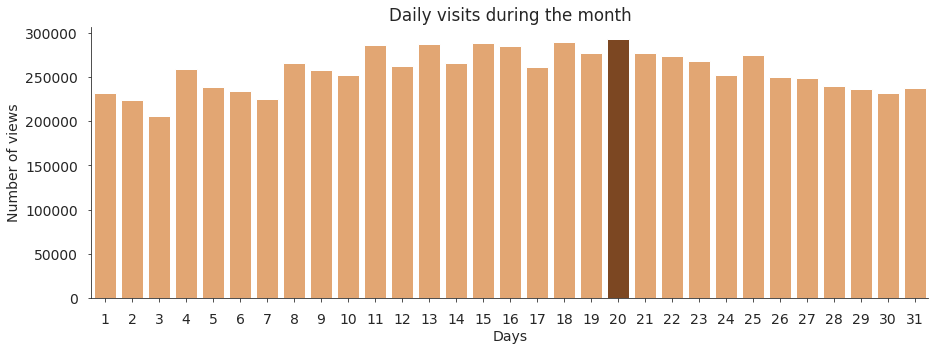

In [ ]:
data = pd.Series(daily_summary_df['number_of_visits'].values, index=daily_summary_df.index.day)

matplotlib.rcParams['figure.figsize'] = (15, 5)
clrs = ['sandybrown' if (x < max(data.values)) else 'saddlebrown' for x in data.values ] #CSS colors
fig  = sns.barplot(x = data.index, y = data.values, palette= clrs);
fig.set(xlabel = 'Days', ylabel = 'Number of views', Title='Daily visits during the month');
fig.set_xticklabels([int(x) for x in data.index])
#fig.set(ylim=(0, 18000))
sns.despine();

In [ ]:
#day with highest visits
daily_summary_df.iloc[daily_summary_df.number_of_visits.argmax()]

number_of_visits       292196.00
number_of_shoppers     207485.00
number_of_purchases     21771.00
total_sales           6378182.94
Name: 2019-10-20 00:00:00+00:00, dtype: float64

Sample: Most number of views were on 13th October 2019. This is surprising for a Tuesday. A likely explanation could be that there was a mega sale event organised by the store. For example, Amazon had the Great Indian festival on 13 October 2019.  

Complete data: 
- Shrinkme witnessed steady shopper visits in Oct’19  
- 257, 263 visits daily on average 
- Most sales were on 20th October which was a Sunday.

##### **Q3. On which day(s) of the week do customers visit more?**

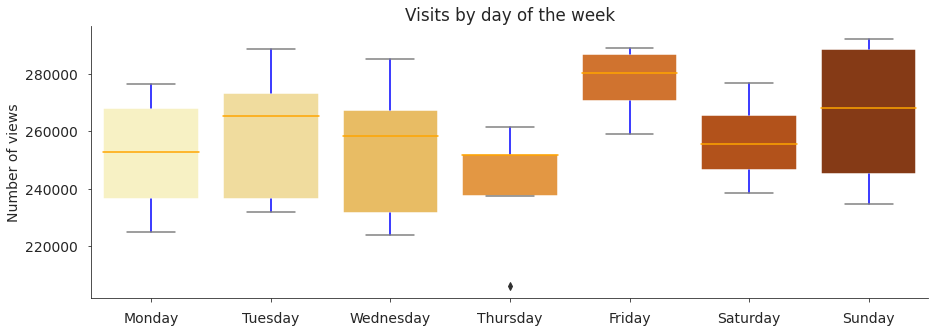

In [ ]:
PROPS = {
    'boxprops':{'edgecolor':'white'},
    'medianprops':{'color':'orange'},
    'whiskerprops':{'color':'blue'},
    'capprops':{'color':'grey'}
}

fig = sns.boxplot(x=daily_summary_df.index.dayofweek,
            y='number_of_visits',
            data=daily_visits_df,
            palette= 'YlOrBr', #Color Brewer color schemes
            **PROPS)
fig.set_xticklabels(labels= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.set(xlabel = '', ylabel = 'Number of views', Title='Visits by day of the week')
sns.despine();

Insights:  
Sample: Weekends see more number of visits than on the weekdays. The high outliers on Tuesdays and Wednesdays indicate sale days or product offer which could have led to the spike in number of visits.

Complete data: 

- Fridays have the highest number of visits each week  
- 3, October, Thursday had the least number of visits. Either there is missing data or the store had technical issues which led to downtime.


In [ ]:
min_visits_day = daily_summary_df[daily_summary_df.number_of_visits == daily_summary_df.number_of_visits.min()]

##### **Q4. Number of shoppers who visit the store daily on an average**

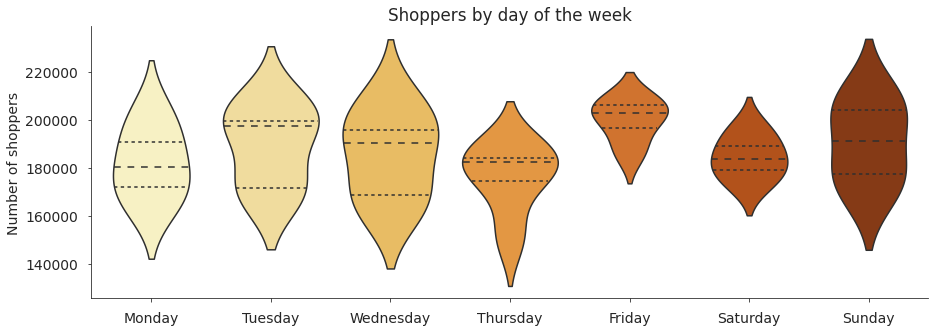

In [ ]:
fig = sns.violinplot(x=daily_visits_df.index.dayofweek,
            y='number_of_shoppers',
            data=daily_visits_df,
            scale="count", 
            inner="quartile",
            palette= 'YlOrBr', #Color Brewer color schemes
            **PROPS)
fig.set_xticklabels(labels= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.set(xlabel = '', ylabel = 'Number of shoppers', Title='Shoppers by day of the week')
sns.despine();

Insights  
Sample: We see the same pattern as visits here. Weekends see more shoppers than on the weekdays. So let's switch to a violin plot to understand the distribution better.

Shoppers visit the store more often on Fridays than other days of the week as the values are closely clustered around the median.

Complete data  
- Shrinkme shoppers prefer Fridays the most and Mondays the least.  
- Thursdays have the least number of shoppers. This is likely due to the single drop that we saw earlier


##### **Q5. Daily sales and cumulative sales during the momth**

In [ ]:
data = pd.DataFrame(daily_summary_df['total_sales'])
data['cumulative_sales'] = data['total_sales'].cumsum()
data.index = data.index.day

In [ ]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:1.1f}M'.format(x*1e-6)

formatter = FuncFormatter(millions)

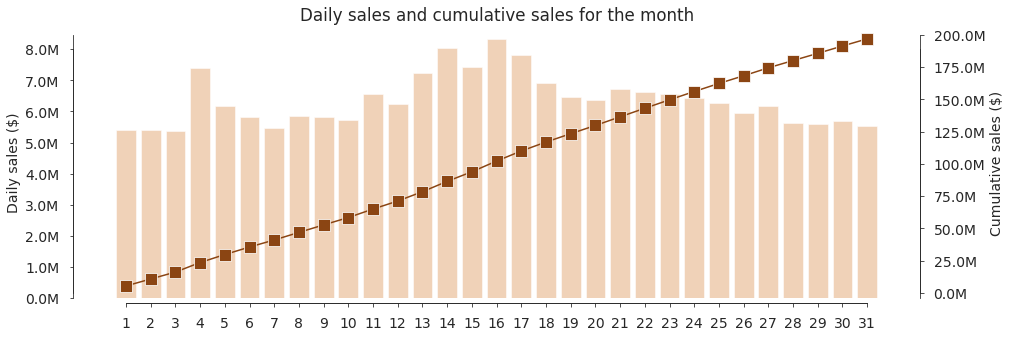

In [ ]:
ax1 = sns.set_style(style='ticks', rc=None )

fig, ax1 = plt.subplots(figsize=(15,5))
sns.barplot(data = data, x=data.index, y=data.total_sales,color='sandybrown', alpha=0.5, ax=ax1);
ax1.set(xlabel="",ylabel='Daily sales ($)')
ax1.yaxis.set_major_formatter(formatter)

ax2 = ax1.twinx()
#resolve twin axis offset issue
data = data.set_index(data.index-1)
sns.lineplot(x= data.index, y = data.cumulative_sales, marker='s', markersize=12, color= 'saddlebrown', sort = False, ax=ax2)
ax2.set(xlabel="",ylabel='Cumulative sales ($)')
ax2.yaxis.set_major_formatter(formatter)
#ax2.set_ylim([0, 3000000])
ax2.set(Title='Daily sales and cumulative sales for the month')
sns.despine(right= False, offset= 5, trim= True);

In [ ]:
print("Average daily sales during the month was ", round(daily_summary_df.total_sales.mean(),2))
print("Total sales during the month was ", round(daily_summary_df.total_sales.sum(),2))

Average daily sales during the month was  6355005.92
Total sales during the month was  197005183.64


In [ ]:
#day with highest sales
daily_summary_df.iloc[daily_summary_df.total_sales.argmax()]

number_of_visits       285193.00
number_of_shoppers     207152.00
number_of_purchases     27304.00
total_sales           8313237.23
Name: 2019-10-16 00:00:00+00:00, dtype: float64

In [ ]:
daily_summary_df.iloc[daily_summary_df.total_sales.argmin()]

number_of_visits       206070.00
number_of_shoppers     151588.00
number_of_purchases     16744.00
total_sales           5362638.66
Name: 2019-10-03 00:00:00+00:00, dtype: float64

Insights  
Sample: The store generated \\$77 thousand sales on an average daily . Total sales for the month was \\$ 2.4 million.

Complete data: 
- The store generated \\$6.4 million sales on an average daily. 
- Total sales for the month was \\$ 197 million.
- Shrinkme sold the most on 16 Oct’19 and the least on 3 Oct’19

##### **Q6. Number of products sold during the month**

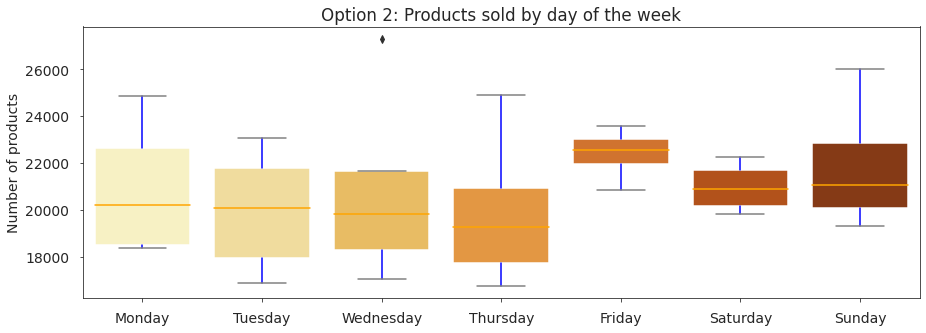

In [ ]:
fig = sns.boxplot(x=daily_summary_df.index.dayofweek,
            y='number_of_purchases',
            data=daily_summary_df,
            palette= 'YlOrBr', #Color Brewer color schemes
            **PROPS)
fig.set_xticklabels(labels= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.set(xlabel = '', ylabel = 'Number of products', Title='Option 2: Products sold by day of the week');

In [ ]:
daily_summary_df.number_of_purchases.mean()

20902.25806451613

Insights  
sample: The store sold 241 items per day on average. The sale was clearly successful. But the day doesn't match as the store sold close to 100 items more than average on a Wednesday. The timezone information is missing in this dataset. So this could be be a spillover from the Tuesday sale.

complete data: The store sold 16,533 products on an average per day.

##### **Q7. Do shoppers prefer a particular window during hour of the day?**

In [ ]:
#Floor datetime index to the nearest hour and aggregate
hourly_visits_df = (visits_df.groupby(by= visits_df.index.floor('H'))
                            .agg(number_of_visits= ('user_session',lambda x: x.nunique()), 
                                 number_of_shoppers= ('user_id',lambda x: x.nunique()))
            )
#Create a summary for analysis by hour of the weekday
visits_by_hour = (hourly_visits_df.groupby(by= [hourly_visits_df.index.dayofweek, hourly_visits_df.index.hour])
                               .agg(number_of_visits= ('number_of_visits', lambda x: round(x.mean(),0)))
                               .rename_axis(index=['week_day', 'hourofday']) #Rename multi-index
                               .reset_index()) #Reset index level
#Pivot for heatmap
visits_by_hour = visits_by_hour.pivot(index = 'week_day', columns= 'hourofday', values = 'number_of_visits')

In [ ]:
weekday_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [ ]:
hour_labels = ['12:00 AM','01:00 AM', '02:00 AM', '03:00 AM', '04:00 AM', '05:00 AM', 
                '06:00 AM', '07:00 AM', '08:00 AM', '09:00 AM', '10:00 AM', '11:00 AM',
                '12:00 PM','01:00 PM', '02:00 PM', '03:00 PM', '04:00 PM', '05:00 PM',
                '06:00 PM', '07:00 PM', '08:00 PM', '09:00 PM', '10:00 PM', '11:00 PM']
 

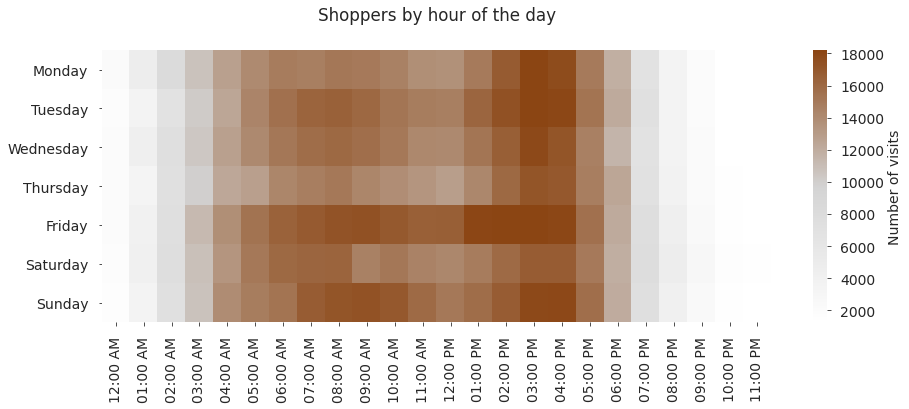

In [ ]:
#Customise colors for a more intuitive chart
colors =  ["white", "lightgrey", "saddlebrown"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = sns.heatmap(visits_by_hour, 
            cmap = cmap,
            annot = False, 
            robust= True,
            xticklabels= hour_labels,
            yticklabels= weekday_labels
            )
fig.axes.set_ylabel('')    
fig.axes.set_xlabel('')
fig.axes.collections[0].colorbar.set_label("Number of visits")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_title( "Shoppers by hour of the day", pad = 30);        



Insights  
- Data is in UTC ,  but trends indicate visits from multiple time-zones
- Most visits occurred in the window of 2:00 P.M to 4:00 P.M UTC
- This insight can be useful to time  product promotions or discount campaigns


In [ ]:
#Save work
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda


'https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda'

#### **Product summary tables**

##### **Brand summary**

In [ ]:
brand_visits_df = (ecomm_df.groupby(by = 'brand')
                  .agg(number_of_views = ('user_session', lambda x: x.nunique()),
                       number_of_shoppers = ('user_id', lambda x: x.nunique()))
)
brand_sales_df = (ecomm_df[is_purchase].groupby(by= 'brand')
                                       .agg(total_sales = ('price', lambda x: x.sum()),
                                            avg_sales = ('price', lambda x: x.mean()),
                                            number_of_purchases = ('user_session',lambda x: x.nunique())))
brand_summary_df = pd.merge(brand_visits_df, brand_sales_df, on= 'brand')
brand_summary_df.reset_index(inplace= True)
brand_summary_df.head(3)

,brand,number_of_views,number_of_shoppers,total_sales,avg_sales,number_of_purchases
0,a-case,4524,4255,250.04,4.47,56
1,a-derma,140,111,12.36,12.36,1
2,a-mega,220,203,1031.47,114.61,9


In [ ]:
# Write the DataFrame to csv file.
with open('/gdrive/My Drive/eda-ecomm-project/brand_summary_oct.csv', 'w') as f:
     brand_summary_df.to_csv(f)

##### **Q8. Most popular brands during the month**

In [ ]:
top_100_brands_by_views = brand_summary_df[~(brand_summary_df['brand'] == 'nobrand')].sort_values(by='number_of_views', ascending= False).head(100)
brand_wordcloud = top_100_brands_by_views.brand.str.cat(sep=" ")
brand_display_text= brand_wordcloud

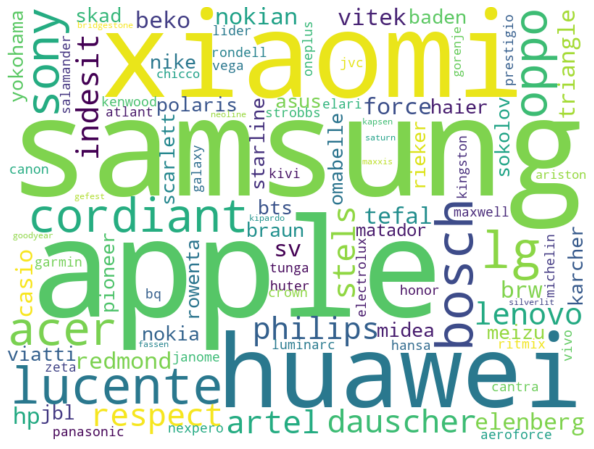

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
# Create the wordcloud object
wordcloud = WordCloud(width=800, height=600, margin=0, background_color='white').generate(brand_display_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
top_10_brands_by_views = brand_summary_df[~(brand_summary_df['brand'] == 'nobrand')].sort_values(by='number_of_views', ascending= False).head(10)

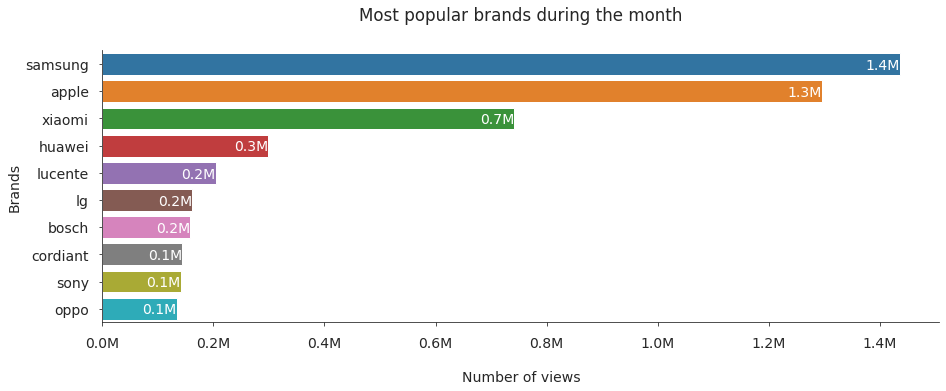

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
fig  = sns.barplot(x = top_10_brands_by_views.number_of_views, y = top_10_brands_by_views.brand);
fig.set( ylabel = 'Brands',
         xlabel = 'Number of views'
        )
fig.axes.xaxis.set_major_formatter(formatter)
fig.axes.xaxis.labelpad = 20
fig.set_title('Most popular brands during the month', pad= 30)

for p in fig.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.1f}M'.format(width/1000000),
             ha='right', va='center', color= 'white')
sns.despine();

Insights  

- Samsung, Apple and Xiaomi, Huawei, Lucente, Bosch were the most popular brands viewed by shoppers

##### **Q9. Most purchased brands during the month**

In [ ]:
top_10_brands_by_sales = brand_summary_df[~(brand_summary_df['brand'] == 'nobrand')].sort_values(by='total_sales', ascending= False).head(10)
top_10_brands_by_sales['pct_of_monthly_sales'] = top_10_brands_by_sales['total_sales']/daily_summary_df.total_sales.sum()
others_pct = 1- top_10_brands_by_sales.pct_of_monthly_sales.sum()
others_sales = brand_summary_df.total_sales.sum() - top_10_brands_by_sales.total_sales.sum()

In [ ]:
pie_data = top_10_brands_by_sales[['brand','total_sales','pct_of_monthly_sales']]
pie_data.loc[len(pie_data.index)]= ["others", others_sales, others_pct]


In [ ]:
pie_data.sort_values(by= 'total_sales',ascending= False, inplace= True)
pie_data.reset_index(inplace= True, drop= True)
#legend_labels = pie_data.brand +  pie_data.total_sales.apply(lambda x: ' ${:1.3f}K'.format(x*1e-6))
legend_labels = pie_data.brand +  pie_data.total_sales.apply(lambda x: ' ${:1.1f}M'.format(x*1e-6))

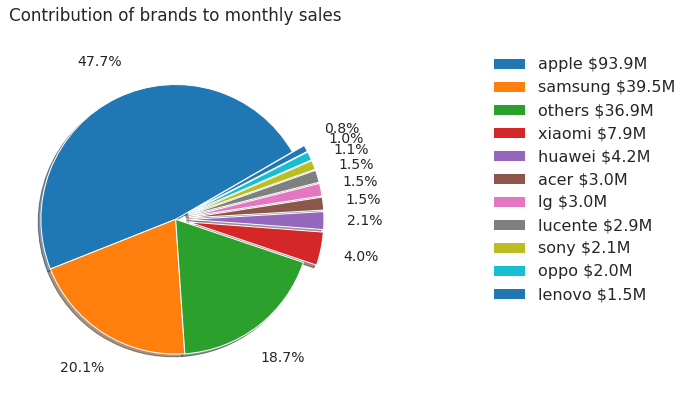

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 6)
values = pie_data.pct_of_monthly_sales*100
explode = ( 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1)
pie = plt.pie(values, labels= None, textprops={'fontsize': 14}, explode=explode, shadow=True, startangle=30,
autopct='%1.1f%%', pctdistance = 1.3, labeldistance = 1.3)
plt.legend(pie[0], legend_labels, fontsize='16', loc="lower corner",frameon=False, bbox_to_anchor = (1.4,1.025))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.title('Contribution of brands to monthly sales', pad= 30);

Insights  
- Apple was the highest contributor(47.7%) to  total sales in Oct’19 with $93.9 million.
- Samsung ( 20.1%)  followed with \$39.5 million of monthly sales
- Brands not in the top 10 contributed 18.7% with   \$36.9 million of monthly sales


##### **Category summary**

In [ ]:
category_visits_df = (ecomm_df.groupby(by= 'category_code')
                              .agg(number_of_shoppers = ('user_id', lambda x: x.nunique()),
                                    number_of_visits = ('user_session', lambda x: x.nunique()))
                    )
category_sales_df = (ecomm_df[is_purchase].groupby(by= 'category_code')
                                       .agg(total_sales = ('price', lambda x: x.sum()),
                                            avg_sales = ('price', lambda x: x.mean()),
                                            number_of_purchases = ('user_session',lambda x: x.nunique())))
category_summary_df = pd.merge(category_visits_df,category_sales_df, on= 'category_code' )
category_summary_df.reset_index(inplace= True)

In [ ]:
#Split categories
category_summary_df[['main_category', 'sub_category1','sub_category2','sub_category3']] = category_summary_df['category_code'].str.split(".",expand=True)
#category_summary_df.drop(columns= 'category_code', inplace=True)
#category_summary_df.set_index('main_category', inplace= True)
category_summary_df.head(3)

,category_code,number_of_shoppers,number_of_visits,total_sales,avg_sales,number_of_purchases,main_category,sub_category1,sub_category2,sub_category3
0,accessories.bag,41929,53935,50045.36,42.52,1154,accessories,bag,None,None
1,accessories.umbrella,1294,1354,560.56,25.48,22,accessories,umbrella,None,None
2,accessories.wallet,7638,9717,12890.23,49.01,261,accessories,wallet,None,None


In [ ]:
# Write the DataFrame to csv file.
with open('/gdrive/My Drive/eda-ecomm-project/category_summary_oct.csv', 'w') as f:
      category_summary_df.to_csv(f)

In [ ]:
main_category_summary = (category_summary_df.groupby(by = ['main_category','sub_category1'])
                                          .agg(number_of_visits = ('number_of_visits', lambda x: x.sum()),
                                               total_sales = ('total_sales', lambda x: x.sum()),
                                              num_items_sold = ('number_of_purchases', lambda x: x.sum()))
                                              .sort_values(by= 'number_of_visits', ascending= False))

##### **Q10. Most viewed categories during the month** 

In [ ]:
main_category_summary.reset_index(inplace= True)

In [ ]:
views = (pd.pivot_table(main_category_summary, 
                       index= 'main_category', 
                       columns= 'sub_category1', 
                       values= 'number_of_visits', 
                       fill_value=0,
                       aggfunc='sum',
                       margins=True)
                      .sort_values('All', ascending=True)        # sort by row sum
                      .drop('All', axis=1)                        # drop column `All`
                      .sort_values('All', ascending=True, axis=1) # sort by column sum
                      .drop('All'))                               # drop row `All`

Solution to sort values in a pivot table can be found [here](https://stackoverflow.com/questions/60778854/sort-pandas-pivot-table-by-sum-of-rows-and-columns)

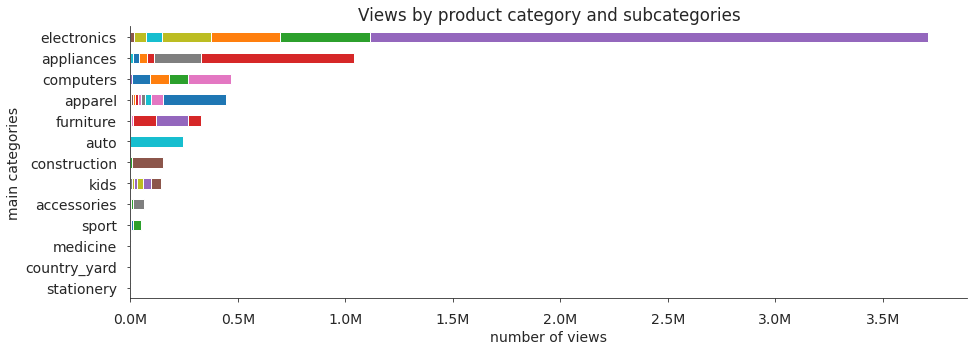

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
fig = views.plot(kind="barh", stacked=True)
fig.set(xlabel = 'number of views', 
        ylabel = 'main categories', 
        Title='Views by product category and subcategories'
        )
fig.axes.xaxis.set_major_formatter(formatter)
fig.legend_.remove()
sns.despine();

Insights  
- Electronics was the most viewed category followed by appliances

##### **Q11. Top 10 categories and sub categories by sales**  

In [ ]:
main_category_summary.head(3)

,main_category,sub_category1,number_of_visits,total_sales,num_items_sold
0,electronics,smartphone,2593222,132820903.94,266986
1,appliances,kitchen,713647,9322804.04,42360
2,electronics,audio,420375,3529507.55,29957


In [ ]:
cat_sales = main_category_summary[['main_category','sub_category1','total_sales']]
cat_sales= cat_sales.head(10).sort_values(by= 'total_sales', ascending= False)


References: [categorical bubble](https://stackoverflow.com/questions/50399802/python-categorical-bubble-plot)
[labels](https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn)

In [ ]:
cat_sales['bubble_labels'] = cat_sales['sub_category1'].astype(str) + " " + cat_sales.total_sales.apply(lambda x: '${:1.1f}M'.format(x*1e-6))


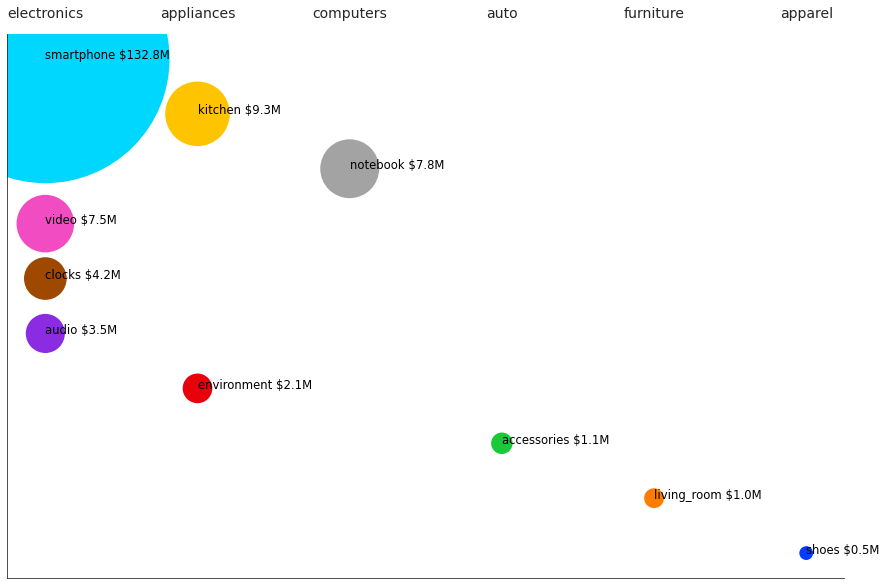

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
sns.set_style('white')
cat_size = cat_sales.total_sales*100000/cat_sales.total_sales.sum()
minsize = min(cat_size)*0.8
maxsize = max(cat_size)*0.8

plt.figure(figsize=(15,10))
fig = sns.scatterplot(x = 'main_category', # Horizontal axis
                    y = 'sub_category1', # Vertical axis
                    hue= cat_size, 
                    size= cat_size, 
                    sizes=(minsize, maxsize), #Size of bubble based on data size
                    palette= 'bright',
                    data= cat_sales, # Data source
                    legend= False)  
fig.set(xlabel="")  # remove the axis label
fig.axes.get_yaxis().set_visible(False) #turn off y-axis
fig.axes.tick_params(labelbottom=False,labeltop=True)
#fig.axes.set_title('Top 10 categories by sales', pad=30)

#Annotate bubbles with labels
for line in range(0,cat_sales.shape[0]):
     fig.text(cat_sales.main_category[line], cat_sales.sub_category1[line], 
     cat_sales.bubble_labels[line], horizontalalignment='left', 
     size='small', color='black', weight='normal')

sns.despine()

Insights:  
- Smartphones generated the most sales  of \$132.8 million, among sub categories
- Kitchen appliances are the second most sold items by total number of sales with \$9.3 million in sales


##### **Q12. Conversion by category**  
  $$conversion\ rate = \frac{number\ of\ purchases}{number\ of\ views}$$ 

  Note: A `purchase` by the customer is a `sale` for store.

In [ ]:
#Calculate conversion rates
main_category_summary = main_category_summary.groupby('main_category', as_index=False).sum().eval('conv_rate = num_items_sold / number_of_visits')

In [ ]:
main_category_summary.head(3)

,main_category,number_of_visits,total_sales,num_items_sold,conv_rate
0,accessories,65006,63496.15,1437,0.02
1,apparel,443489,567386.92,7050,0.02
2,appliances,1041114,12073377.81,66565,0.06


In [ ]:
data = (pd.Series(main_category_summary['conv_rate'].values, 
                 index=main_category_summary.main_category)
                .sort_values(axis= 0, ascending= False))

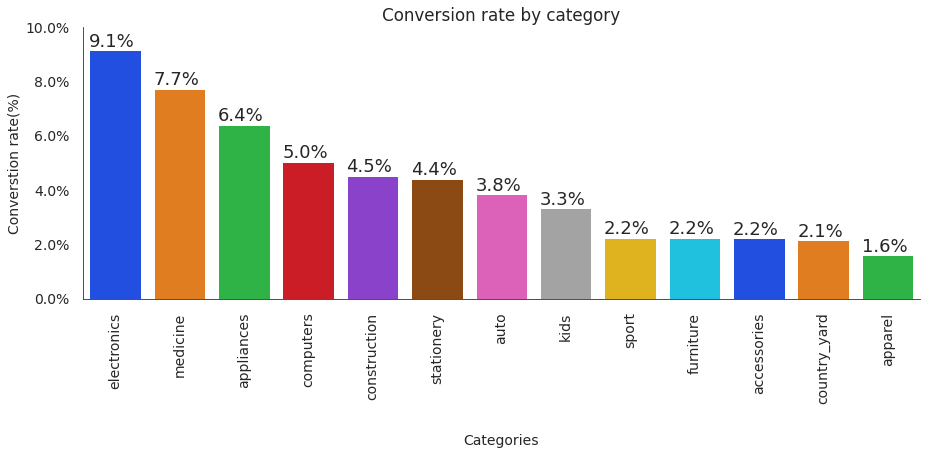

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
fig  = sns.barplot(x = data.index, y = data.values, palette= 'bright');
fig.set(xlabel = 'Categories', ylabel = 'Converstion rate(%)', Title='Conversion rate by category');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.axes.xaxis.labelpad = 30
fig.axes.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

#add bar labels
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    fig.axes.annotate(percentage, (x, y), size = 18,
                      ha='center',va="bottom")
fig.set(ylim=(0, 0.10))
sns.despine();

Insights:  
- Electronics had the highest conversion rate of 9.1% followed by medicine at 7.7%
- Apparel had the lowest rate 1.6% among the top 10 categories by conversion rates



**Q.Sales by big ticket items**

Where is Apple's contribution coming from? Did Apple sell more units or have a high price or was it a combination of both?

For future analysis 

In [ ]:
#Save work
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda


'https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda'

#### **Customer summary tables**

In [ ]:
grp = ecomm_df.groupby(['user_id', 'event_type'])['user_session'].nunique().reset_index(name='count')

#Create summary of customer events during the month at a customer level
customer_visits_df = pd.DataFrame(grp.pivot('user_id', 'event_type', 'count'))
customer_visits_df.fillna(0, inplace= True)

In [ ]:
#Create summary of customer spend during the month
customer_spend_df = (sales_df.groupby(by= 'user_id')
                         .agg( total_spend = ('price', lambda x: x.sum()),
                               avg_spend = ('price', lambda x: x.mean()))
                         )

In [ ]:
#Convert categorical index to column
customer_visits_df.columns = customer_visits_df.columns.tolist()
customer_visits_df.reset_index(inplace= True)

In [ ]:
#Merge with outer join
customer_summary_df = pd.merge( customer_visits_df, customer_spend_df, on= 'user_id', how='outer')



In [ ]:
sales_df.reset_index(inplace= True)

# Get most recent purchase date
recent_purchase_df = sales_df.sort_values('event_time').groupby('user_id')[['event_time']].last()

#Add recent purchase date to summary
customer_summary_df = pd.merge(customer_summary_df, recent_purchase_df,on='user_id', how= 'outer')

In [ ]:
#Rename columns
dict = {'user_id':'user_id', 
        'cart': 'number_of_carts',
        'purchase':'number_of_purchases',
        'view':'number_of_views',
        'total_spend': 'total_spend',
        'avg_spend':'avg_spend',
       'event_time': 'recent_purchase_date'}
customer_summary_df.rename(columns=dict,inplace=True)
#fill 0 only for relevant columns, else datetime gets messed up
#customer_summary_df.fillna(0, inplace= True)


In [ ]:
customer_summary_df.head(3)

,user_id,number_of_carts,number_of_purchases,number_of_views,total_spend,avg_spend,recent_purchase_date
0,33869381,0,0,1,nan,nan,NaT
1,64078358,0,0,1,nan,nan,NaT
2,183503497,0,0,1,nan,nan,NaT


In [ ]:
# Write the DataFrame to csv file.
with open('/gdrive/My Drive/eda-ecomm-project/customer_summary_oct.csv', 'w') as f:
      customer_summary_df.to_csv(f)

**Q. Customer purchase distribution?**

In [ ]:
customer_summary_df.head(3)

,user_id,number_of_carts,number_of_purchases,number_of_views,total_spend,avg_spend,recent_purchase_date
0,33869381,0,0,1,nan,nan,NaT
1,64078358,0,0,1,nan,nan,NaT
2,183503497,0,0,1,nan,nan,NaT


In [ ]:
#Looks like the session only records the purchase if there is one and no cart or views.
ecomm_df[ecomm_df['user_id'] == 473668240]

,event_type,category_code,brand,price,user_id,user_session
event_time,,,,,,
2019-10-09 13:53:25+00:00,view,nocategory,bosch,277.46,473668240,fb027c82-2152-4175-89fe-dfa3a7c040dc
2019-10-09 13:58:56+00:00,purchase,appliances.kitchen.mixer,kitfort,149.04,473668240,fb027c82-2152-4175-89fe-dfa3a7c040dc
2019-10-09 14:02:35+00:00,cart,nocategory,samsung,19.82,473668240,fb027c82-2152-4175-89fe-dfa3a7c040dc
2019-10-09 14:03:21+00:00,purchase,nocategory,samsung,19.82,473668240,fb027c82-2152-4175-89fe-dfa3a7c040dc


Let us check the distribution of the average spend per customer

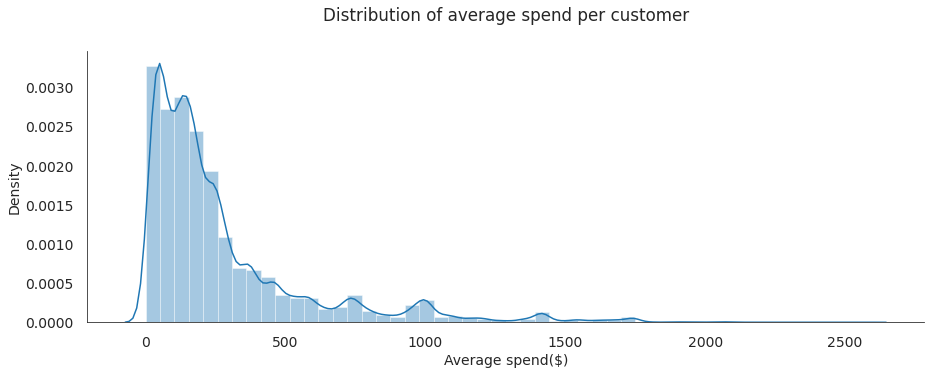

In [ ]:
plt.figure(figsize=(15,5))
fig = sns.distplot(customer_summary_df['avg_spend'])
fig.axes.set_title('Distribution of average spend per customer', pad=30)
fig.set(xlabel = 'Average spend($)')
sns.despine();

Most customers spent less than \\$500. 

**Q. Customer conversion**
 

In [ ]:
customer_funnel = customer_summary_df[['number_of_views','number_of_carts', 'number_of_purchases']].apply(sum)
labels =  ['Views','Carts','Purchases']

In [ ]:
fig = go.Figure(go.Funnel(
                 y= labels, 
                 x= customer_funnel.values,
                 textinfo = "value+percent initial",
                 #texttemplate='%{text:.2s}',
                 marker = {"color": ["sandybrown", "lightsalmon", "tan"],
                "line": {"width": [1, 1, 1]}},
                 connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}))
fig.update_layout(autosize=False,
                  height = 400,
                  width= 600,
                  font_size = 18,
                  plot_bgcolor='#fff',
                  title="Customer conversion funnel"                 
                  )
fig.show()

In [ ]:
customer_funnel

number_of_views        7645265
number_of_carts         435210
number_of_purchases     596717
dtype: int64

Sample: The conversion rate is total number of purchases divided by the total number of views.
Conversion rate for the month was 1.9% . Industry average conversion rates vary from 1% to 4%. US e-commerce is at 1.4%. By those benchmarks, the store conversion rate for the month was higher than the benchmark.[ref](https://vwo.com/blog/ecommerce-conversion-rate/#:~:text=As%20per%20Littledata%2C%20the%20average,as%20of%20Q2%2C%202019)

Complete dataset: The conversion rate is 7.8%

In [ ]:
#Save work
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda


'https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda'

#### **RFM Tables**

##### **Q13. Who are our most valuable customers?**

Let us analyse our customers in some more detail. An RFM analysis is a commonly used segmentation technique to group customers based on 3 types of behaviour.

- **R**ecency : number of days since the last purchase  
- **F**requency : number of purchases made in the month  
- **M**onetary Value : total amount spent in the month 

Frequency and monetary value are important measures of _Customer lifetime value_. Recency is an important measure for _Customer engagement_

 This section has been adapted from 3 sources below
1. [RFM with Python](https://www.linkedin.com/pulse/recency-frequency-monetary-model-python-how-sephora-uses-yuan-yexi)
2. [solution when pd.qcut assumes n bins of equal size](https://stackoverflow.com/questions/36880490/why-use-pandas-qcut-return-valueerror-bin-edges-must-be-unique)
3. [using-qcut-on-series-with-fewer-values-than-quantiles](https://stackoverflow.com/questions/44050696/pandas-using-qcut-on-series-with-fewer-values-than-quantiles)

In [ ]:
#get date of last reported event and days in the month being analysed
snapshot_date = daily_summary_df.index.max()
month = customer_summary_df.recent_purchase_date.min().strftime('%B')
days_in_month = pd.Period(month).daysinmonth

In [ ]:
#Create rfm table, drop customers with no purchases
have_purchases = customer_summary_df['number_of_purchases']> 0
buying_customers = customer_summary_df[have_purchases][['user_id','number_of_purchases','total_spend','recent_purchase_date']]
rfm_df = buying_customers[['user_id','number_of_purchases','total_spend']]

In [ ]:
#create new column with delta of days since last visit
days_since_last_visit =  list(buying_customers['recent_purchase_date']
                                        .apply(lambda x: (snapshot_date - x.floor('D')).days))
rfm_df.insert(1, 'days_since_last_visit', days_since_last_visit)

#rename columns to recency, frequency, and monetary value
rfm_df = rfm_df.rename(columns = {
                                  'days_since_last_visit':'recency',
                                  'number_of_purchases':'frequency',
                                  'total_spend': 'monetary_value',
                  })
rfm_df.head(3)

,user_id,recency,frequency,monetary_value
49,264649825,25,2,1240.04
129,303160429,18,1,340.59
237,340041246,17,3,915.52


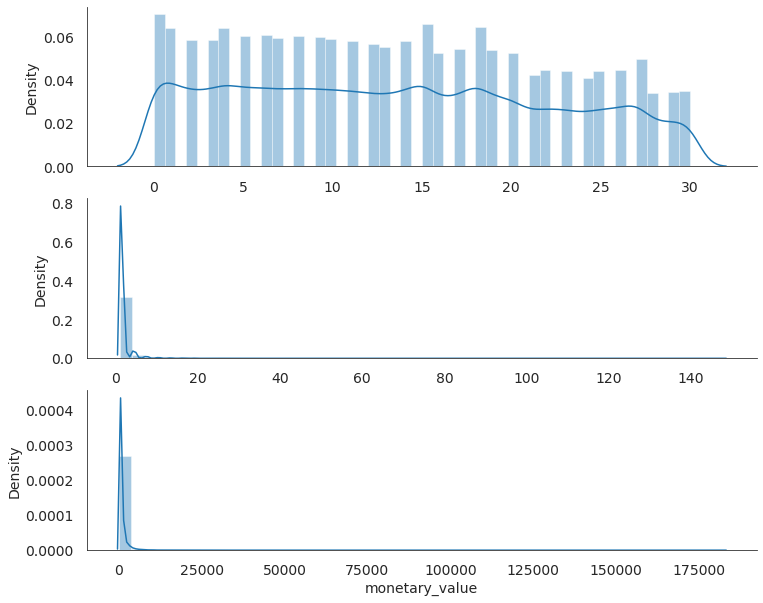

In [ ]:
#Let us check the distributions of RFM
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_df['monetary_value'])
sns.despine()

In [ ]:
rfm_df.head(2)

,user_id,recency,frequency,monetary_value
49,264649825,25,2,1240.04
129,303160429,18,1,340.59


Partition the data into 5 partitions each using Pandas quantile cut `pd.qcut`. 

In [ ]:
#Partition the data into 5 partitions each for R, F and M

df = rfm_df

def pct_rank_qcut(series, n):
    edges = pd.Series([float(i) / n for i in range(n + 1)])
    f = lambda x: (edges >= x).values.argmax()
    return series.rank(pct=1).apply(f)

df['recency'] = df['recency'].astype(float)
df['frequency'] = df['frequency'].astype(float)
df['monetary_value'] = df['monetary_value'].astype(float)

df['R'] = pct_rank_qcut(df.recency, 5)
df['F'] = pct_rank_qcut(df.frequency, 5)
df['M'] = pct_rank_qcut(df.monetary_value, 5)

# Concatenate RFM quartile values 
df['RFM'] = df['R'].map(str)+ df['F'].map(str)+ df['M'].map(str)

# Calculate RFM_Score by adding individual scores
df['RFM_Score'] = df[['R','F','M']].sum(axis=1)

rfm_df = df

rfm_df.head(3)

,user_id,recency,frequency,monetary_value,R,F,M,RFM,RFM_Score
49,264649825,25.00,2.00,1240.04,5,4,5,545,14
129,303160429,18.00,1.00,340.59,4,2,4,424,10
237,340041246,17.00,3.00,915.52,4,5,5,455,14


In [ ]:
rfm_df = df

In [ ]:
# Define function to label rfm_segments
def rfm_segments(df):
    if df['RFM_Score'] >= 14:
        return 'Absolute Treasures'
    elif ((df['RFM_Score'] >= 12) and (df['RFM_Score'] < 14)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 10) and (df['RFM_Score'] < 12)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 10)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Require Attention'
    else:
        return 'To be Activated'

# Create a new column RFM_Segments
rfm_df['RFM_segment'] = rfm_df.apply(rfm_segments, axis=1)

# Calculate average values for each RFM_Segment, and return a size of each segment 
rfm_segment_agg = rfm_df.groupby('RFM_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1)

rfm_segment_agg.columns = rfm_segment_agg.columns.droplevel()
rfm_segment_agg.columns = ['recency_mean','frequency_mean','monetary_mean', 'segment_size']

In [ ]:
rfm_segment_agg.reset_index(inplace= True)

In [ ]:
rfm_segment_agg['pct_size'] = (rfm_segment_agg['segment_size']/rfm_segment_agg['segment_size'].sum())*100
rfm_segment_agg

,RFM_segment,recency_mean,frequency_mean,monetary_mean,segment_size,pct_size
0,Absolute Treasures,23.10,3.70,1910.80,7400,2.19
1,Champions,16.90,3.30,1482.50,37564,11.11
2,Loyal,14.80,2.50,1017.00,83164,24.60
3,Promising,16.00,1.20,285.70,102351,30.27
4,Require Attention,10.30,1.10,146.20,77794,23.01
5,To be Activated,4.30,1.00,66.60,29805,8.82


Let us now visualise our segments 

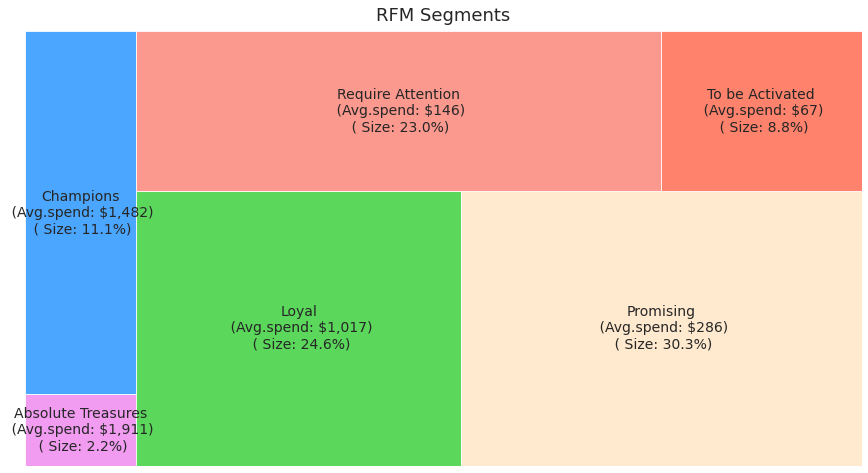

In [ ]:
#Create our plot and resize it.
matplotlib.rcParams['font.size'] = 14
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,8)

# create a color palette, mapped to these values
cmap= matplotlib.cm.viridis
mini= min(rfm_segment_agg['segment_size'])
maxi= max(rfm_segment_agg['segment_size'])
norm= matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors= ['violet','dodgerblue','limegreen','bisque', 'salmon','tomato'] 
labels= (rfm_segment_agg.apply(lambda x: str(x['RFM_segment']) 
                              + "\n (" + "Avg.spend: $" 
                              + str("{:,.0f}".format(x['monetary_mean'])) + ")"
                              +"\n (" +" Size: "+ str("{:.1f}%".format(x['pct_size'])) + ")", axis=1))

squarify.plot(sizes=rfm_segment_agg['segment_size'], 
              label = labels,
              alpha=.8,
              color= colors)
plt.title("RFM Segments",fontsize=18,fontweight="normal", size= 18, pad= 10)
plt.axis('off')
plt.show()

It will nice to visualise the RFM segments by their R, F and M values. [Adapted from Jiwon Jeong](https://towardsdatascience.com/who-is-your-golden-goose-cohort-analysis-50c9de5dbd31)

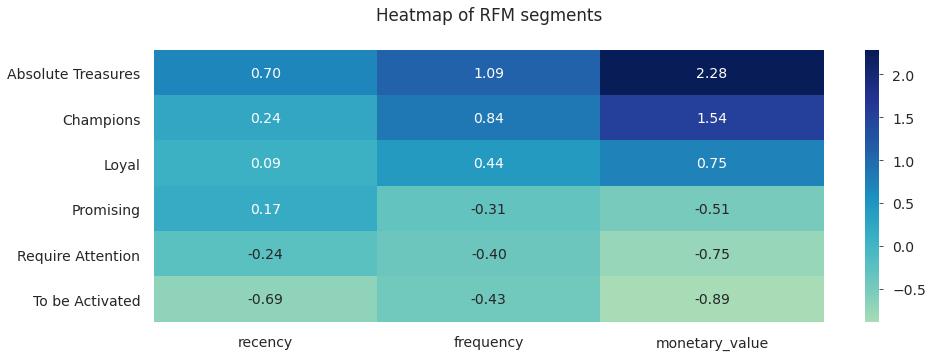

In [ ]:
heatmap_df = rfm_df.set_index('user_id')

# the mean value in total 
total_avg = heatmap_df.iloc[:, 0:3].mean()
total_avg

# calculate the proportional gap with total mean
cluster_avg = heatmap_df.groupby('RFM_segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
fig = sns.heatmap(prop_rfm, 
            cmap= 'YlGnBu', 
            fmt= '.2f', 
            annot = True, 
            center= 0)
            #linewidths= 0.1,
            #linecolor= 'white')

fig.set_ylabel("")            
fig.set_title('Heatmap of RFM segments', pad= 30);


Let us try to bring in an interactive element to the RFM charts using plotly express.

In [ ]:
#add parent for the treemap, else the outermost box will be blank and black
rfm_segment_agg['parent'] = 'Customers'

In [ ]:

fig = px.treemap(rfm_segment_agg, path=['parent','RFM_segment'], values='segment_size',
                  color='monetary_mean', hover_data=['recency_mean', 'frequency_mean'],
                  color_continuous_scale='Aggrnyl',
                  color_continuous_midpoint= (np.average(rfm_segment_agg['frequency_mean'],
                                                        weights=rfm_segment_agg['segment_size']))
                  )

fig.data[0].textinfo = 'label+value+percent entry'
fig.update_layout(title_text='Treemap of customer segments', title_x=0.4)
fig.show()

It will be interesting to explore category purchase by segment using a treemap. Chalking this up for future work.

In [ ]:
daily_summary_df.sum()

number_of_visits        7975167.00
number_of_shoppers      5777474.00
number_of_purchases      647970.00
total_sales           197005183.64
dtype: float64

In [ ]:
customer_summary_df.user_id.nunique()

2798172

In [ ]:
number_of_views

7645038

In [ ]:
avg_order_value = daily_summary_df['total_sales'].sum()/daily_summary_df['number_of_purchases'].sum()
round(avg_order_value,2)

304.03

## **Summary: Shrinkme customer behaviour** 

We analysed the behaviour of Shrinkme's customers  using Python, Pandas, Matplotlib and Seaborn. Here is a summary of the key insights for the month of October 2019.

Key Metrics:

- 2.8 million customers visited the store. There were 0.8 million visits and 7.6 million views

- Total sales for the month of Oct'19 was \\$197.0 million, with an average order value of \\$304.0

- The conversion rate was 7.8%

We also discovered the following insights from our exploratory data analysis.

Visits:
- Shrinkme had a steady flow of visitors during the month
- Most sales were on 20, Oct’19 and least sales on 3,Oct’19
- Shoppers preferred Fridays the most and Mondays the least
- Most visits during the day were in the window of 2:00 P.M  and 4:00 P.M UTC  

Brands and categories:
- Samsung, Apple and Xiaomi were the most popular brands
- Apple was the highest contributor(47.7\%) to total sales with \\$93.9 million
- Electronics had the highest conversion rate of 9.1& followed by medicine at 7.7%
- Smartphones generated the most sales  of \\$132.8 million, among sub categories  

Customers:
- Top segments were Absolute Treasures and Champions who form 13.3% of the total base
- 24.6% of the customers are  Loyal, overall a healthy distribution of segments



## **Future Work**

Exploratory data analysis
- Further analysis on trends
  - Contribution of price, volume to total sales
  - Identify behaviour patterns within customer segments
- Analyse mutliple data sets over months to identify trends. You can find more data from Michael [here](https://drive.google.com/drive/folders/1Nan8X33H8xrXS5XhCKZmSpClFTCJsSpE).
- Create and link analysis to dashboards

Machine Learning  
- Matrix Factorization algorithm for recommendation engines
- K-Means clustering for customer segmentation
- Hidden markov models for customer segregation,churn modeling and delinquency predictions

Programming enhancements
- Improve code modularity with functions to process multiple datasets
- Improve execution speed with better choice of Pandas functions
- Functions for visualisation customisations




## References
- Jovian tutorials
  - [Analyzing Tabular Data with Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
  - [Data Visualization using Python, Matplotlib and Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
  - [Advanced Data Analysis Techniques with Python & Pandas](https://jovian.ai/aakashns/advanced-data-analysis-pandas)
  - [Exploratory Data Analysis Case Study - Stack Overflow Developer Survey](https://jovian.ai/aakashns/stackoverflow-survey-exploratory-data-analysis)
  -  [Interactive Visualization with Plotly](https://jovian.ai/aakashns/interactive-visualization-plotly)
- [10 Key Metrics You MUST Know When Working with Web Data](https://www.youtube.com/watch?v=ZO-YwkVk8Vo) by Eric Sims
- EDA - [Kaggle code](https://www.kaggle.com/adilemrebilgic/e-commerce-analytics) by Adil Emre Bilgic
- RFM analysis
  - [Recency, Frequency, Monetary Model with Python](https://www.linkedin.com/pulse/recency-frequency-monetary-model-python-how-sephora-uses-yuan-yexi) by Yuan Yexi
  - [RFM analysis using Google sheets](https://analyticalmarketer.io/rfm-analysis/) by analyticalmarketer.io
  - [RFM analysis for a gaming company](https://towardsdatascience.com/not-a-regular-rfm-analysis-b44ce044955e)
- [Stackoverflow](https://stackoverflow.com/) hacks, links throughout the notebook
- [Geeks for Geeks](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/#:~:text=Heatmap%20is%20defined%20as%20a,values%2C%20darker%20colors%20are%20preferred)


In [4]:
#Save our work
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda


'https://jovian.ai/anushree-k/zerotoanalyst-ecomm-eda'